# Part 6: Estimating The Temperature Of A Heating Liquid

This Notebook is based on the previous example in Part 5.
Instead of a constant temperature, the liquid is now ehating at a reate of 0.1 °C per second.

Other her parameters will be set/defined as follows:<br>
Process Noise Variance: 0.15  -> We think the model is pretty accurate<br>
Measurement Error: 0.1 °C (std. deviation)<br>

Initial Guess: 10°C
Initial Estimate Uncertainty: $100^2$ ($\sigma^2$)

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Filter:
    
    def __init__(self,init_guess, init_uncertainty,measurement_uncertainty,process_noise,true_temp,temp_stdev):

        self.temp_stdev = temp_stdev
        self.true = self.true_temperature()
        self.init_guess = init_guess
        self.estimation = init_guess
        self.prediction = None
        self.measurement = None
        
        self.heating = 0.1
        
        self.measurements = []
        self.estimations = []
        self.true_temps = []
        self.Ks = []
        self.ps = []
        self.qs = []
        
        self.K = None # Kalman gain
        self.r = measurement_uncertainty # Measurement uncertainty (variance)
        self.p = init_uncertainty # Estimation Uncertainty (variance)
        self.q = process_noise # Process Noise (variance)
        
    def run(self,iterations):
        self.iterations = iterations
        for i in range(1,iterations+1):
            
            self.prediction = self.estimation
            self.p = self.p + self.q
            
            temp = self.true_temperature()+(i*self.heating)
            self.true_temps.append(temp)
            
            self.measurement = self.noisy_measurement(temp)
            self.measurements.append(self.measurement)
            
            self.K = self.p/(self.p+self.r)
            self.Ks.append(self.K)
            
            self.estimation = self.prediction + self.K*(self.measurement-self.prediction)
            self.estimations.append(self.estimation)
            
            self.p = (1-self.K)*self.p
            self.ps.append(self.p)           
        
    
    def true_temperature(self):
        # True Temperature of the liquid
         return np.random.normal(50,self.temp_stdev,1)[0]
    
    
    def noisy_measurement(self,x):
        # Measurement Error
        return np.random.normal(x,self.r,1)[0]
    
    def plot_result(self):
        figure, axis = plt.subplots(3,1,figsize=(15,15))
        axis[0].plot(range(self.iterations),self.true_temps,"r",self.measurements,"b",self.estimations,"g*-")
        axis[0].legend(["True Temperature,","Measurement","Estimation"])
        axis[0].set_title("Temperatures")
        
        axis[1].plot(range(self.iterations),self.ps,[self.r for i in range(self.iterations)])
        axis[1].legend(["Estimation Uncertainty","Measurement Uncertainty"])
        axis[1].set_title("Uncertainty")

        axis[2].plot(range(self.iterations), self.Ks)
        axis[2].legend(["Kalman Gain"])
        axis[2].set_title("Kalman Gain")
        
        
        
    def print_result(self):
        print(f"Initial guess: {self.init_guess}")
        print(f"Estimation at iteration {self.iterations}: {self.estimation}")
        print(f"Kalman Gain at iteration {self.iterations}: {self.K}")
        print(f"Estimation uncertainty at iteration {self.iterations}: {self.p}")

In [18]:
f = Filter(init_guess=10, init_uncertainty=100**2,measurement_uncertainty=0.1,process_noise=0.15,true_temp=50,temp_stdev=0.01)

In [19]:
f.run(25)

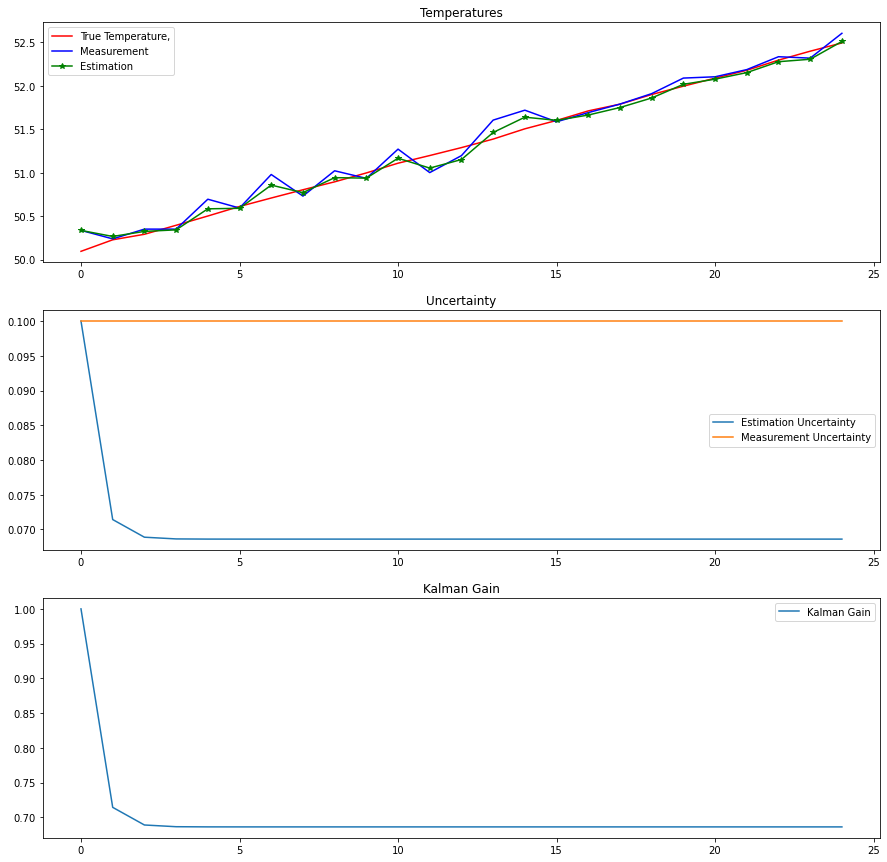

In [20]:
f.plot_result()

Due to the high process uncertainty, the measurement weight is much higher than the estimate weight. Thus, the Kalman Gain is high, and it is converges to 0.7.

We can get rid of the lag error by setting a high process uncertainty. However, since our model is not well-defined, we get noisy estimates that are almost equal to the measurements, and we miss the goal of the Kalman Filter.

The best Kalman Filter implementation would involve a model that is very close to reality leaving a little room for process noise. However, a precise model is not always available - for example an airplane pilot may decide to perform a sudden maneuver that will change predicted airplane trajectory. In this case, the process noise would be increased.